In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_wittyer_vcf(vcf_path):
    df = pd.read_csv(vcf_path, comment='#', sep='\t', header=None, names=['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'TRUTH', 'QUERY'])
    return df

In [3]:
dragen_nist_wittyer_vcf_path = "/Users/gaoyueya/Documents/Projects/TAG-Ticket1789/HG2T2T_v1/Wittyer.HG2_dipcall_v1_DEL.Vs.HG2_dragen_4_2_4_DEL.vcf"
gatk_sv_nist_wittyer_vcf_path = "/Users/gaoyueya/Documents/Projects/TAG-Ticket1818/GATK-SV-HG002/Wittyer.HG2_dipcall_v1_DEL.Vs.HG2_GATKSV_4_2_6.vcf"

dragen_nist_wittyer_vcf = read_wittyer_vcf(dragen_nist_wittyer_vcf_path)
gatk_sv_nist_wittyer_vcf = read_wittyer_vcf(gatk_sv_nist_wittyer_vcf_path)

In [4]:
# Select DRAGEN entries in wittyer output vcf
dragen_nist_wittyer_vcf.head()
dragen_entry_indexes = [index for index, row in dragen_nist_wittyer_vcf.iterrows() if 'DRAGEN' in row['ID'] and 'PASS' in row['FILTER']]
selected_dragen_nist_wittyer_vcf = dragen_nist_wittyer_vcf.reindex(dragen_entry_indexes)

In [5]:
selected_dragen_nist_wittyer_vcf

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,TRUTH,QUERY
2,chr1,789481,DRAGEN:GAIN:chr1:789482-224014488,N,<DUP>,150,PASS,"CIEND=0,20;CIPOS=0,20;END=224014488;END_RIGHT_...",GT:FT:GQ:PL:PR:SR:WIT:WHY:WHAT,.,"0/1:PASS:602:652,0,663:11,5:33,21:FP:NoOverlap:."
4,chr1,934321,DRAGEN:LOSS:chr1:934322-934937,N,<DEL>,150,PASS,"CIGAR=1M616D;CIPOS=0,25;END=934937;HOMLEN=25;H...",GT:FT:GQ:PL:PR:SR:WIT:WHY:WHAT,.,"1/1:PASS:55:924,58,0:1,2:0,24:TP:GtMismatch:am"
8,chr1,1934923,DRAGEN:LOSS:chr1:1934924-1935584,N,<DEL>,150,PASS,"CIGAR=1M661D;CIPOS=0,13;END=1935584;HOMLEN=13;...",GT:FT:GQ:PL:PR:SR:WIT:WHY:WHAT,.,"0/1:PASS:503:553,0,707:24,1:38,18:TP:GtMismatc..."
10,chr1,1934989,DRAGEN:LOSS:chr1:1934990-1935584,N,<DEL>,150,PASS,"CIGAR=1M595D;CIPOS=0,10;END=1935584;HOMLEN=10;...",GT:FT:GQ:PL:PR:SR:WIT:WHY:WHAT,.,"0/1:PASS:426:476,0,746:21,2:42,16:TP:GtMismatc..."
11,chr1,2122128,DRAGEN:LOSS:chr1:2122129-2124374,N,<DEL>,150,PASS,"CIEND=0,10;CIPOS=0,10;END=2124374;HOMLEN=10;HO...",GT:FT:GQ:PL:PR:SR:WIT:WHY:WHAT,.,"0/1:PASS:556:606,0,635:34,2:21,20:FP:NoOverlap:."
...,...,...,...,...,...,...,...,...,...,...,...
3368,chrY,11002305,DRAGEN:LOSS:chrY:11002306-11003098,N,<DEL>,150,PASS,"CIEND=-150,151;CIPOS=-101,102;END=11003098;IMP...",GT:FT:GQ:PL:PR:WIT:WHY:WHAT,.,"1:PASS:21:258,0:0,8:TP:GtMismatch:am"
3371,chrY,11036143,DRAGEN:LOSS:chrY:11036144-11037103,N,<DEL>,150,PASS,"CIEND=-180,180;CIPOS=-319,319;END=11037103;IMP...",GT:FT:GQ:PL:PR:WIT:WHY:WHAT,.,"1:PASS:112:276,109:9,11:TP:GtMismatch:am"
3372,chrY,11333248,DRAGEN:GAIN:chrY:11333249-11360005,N,<DUP>,88,PASS,END=11360005;REFLEN=26757;SVCLAIM=D;SVLEN=2675...,GT:SM:CN:BC:GC:CT:AC:PE:WIT:WHY:WHAT,.,"1:2.34156:2:12:0.381844:0.475838:0.518892:12,3..."
3390,chrY,56822082,DRAGEN:GAIN:chrY:56822083-56838588,N,<DUP>,150,PASS,END=56838588;REFLEN=16506;SVCLAIM=D;SVLEN=1650...,GT:SM:CN:BC:GC:CT:AC:PE:WIT:WHY:WHAT,.,"1:5.22856:5:12:0.431843:0.663516:0.554707:8,7:..."


In [6]:
dragen_attribute_dict_dict = {}
for index, row in selected_dragen_nist_wittyer_vcf.iterrows():
    dragen_attribute_dict = {}
    info_list = row['INFO'].split(';')
    end = [i.split('=')[1] for i in info_list if i.startswith('END=')][0]
    chr = row['CHROM']
    pos = row['POS']
    interval = f"{chr}:{pos}-{end}"
    length_category = [i.split('=')[1].split('|')[1] for i in info_list if i.startswith('WIN=')][0]
    svtype = row['ALT']
    query_list = row['QUERY'].split(':')
    eval_type = query_list[-3]
    dragen_attribute_dict['interval'] = interval
    dragen_attribute_dict['svtype'] = svtype
    dragen_attribute_dict['length_category'] = length_category
    dragen_attribute_dict['nist_eval_type'] = eval_type
    dragen_attribute_dict_dict[interval] = dragen_attribute_dict
    

In [7]:
dragen_wittyer_attribute_df = pd.DataFrame(dragen_attribute_dict_dict).T.reset_index().drop(columns=['index'])
dragen_wittyer_attribute_df

,interval,svtype,length_category,nist_eval_type
0,chr1:789481-224014488,<DUP>,100000+,FP
1,chr1:934321-934937,<DEL>,500-1000,TP
2,chr1:1934923-1935584,<DEL>,500-1000,TP
3,chr1:1934989-1935584,<DEL>,500-1000,TP
4,chr1:2122128-2124374,<DEL>,1000-5000,FP
...,...,...,...,...
1106,chrY:11002305-11003098,<DEL>,500-1000,TP
1107,chrY:11036143-11037103,<DEL>,500-1000,TP
1108,chrY:11333248-11360005,<DUP>,25000-50000,FP
1109,chrY:56822082-56838588,<DUP>,10000-25000,FP


In [8]:
dragen_DEL_wittyer_attribute_df = dragen_wittyer_attribute_df[dragen_wittyer_attribute_df['svtype'] == '<DEL>']
dragen_DUP_wittyer_attribute_df = dragen_wittyer_attribute_df[dragen_wittyer_attribute_df['svtype'] == '<DUP>']

In [9]:
for cat in sorted(set(dragen_DEL_wittyer_attribute_df['length_category'].tolist())):
    fp_count = len(dragen_wittyer_attribute_df[(dragen_wittyer_attribute_df['nist_eval_type'] == 'FP')&(dragen_wittyer_attribute_df['length_category'] == cat)])
    tp_count = len(dragen_wittyer_attribute_df[(dragen_wittyer_attribute_df['nist_eval_type'] == 'TP')&(dragen_wittyer_attribute_df['length_category'] == cat)])
    print(f"length_category: {cat}, TP: {tp_count}, FP: {fp_count}")

length_category: 1000-5000, TP: 451, FP: 22
length_category: 10000-20000, TP: 38, FP: 14
length_category: 20000-50000, TP: 20, FP: 14
length_category: 500-1000, TP: 244, FP: 35
length_category: 5000-10000, TP: 118, FP: 7
length_category: 50000+, TP: 10, FP: 23


In [10]:
dragen_DEL_wittyer_attribute_df['caller'] = ['DRAGEN v4.2.4']*len(dragen_DEL_wittyer_attribute_df)
dragen_DEL_wittyer_attribute_df

/var/folders/3p/dhcl5_n93wn0c2pl7dgbqy2c0000gq/T/ipykernel_20516/1196779981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dragen_DEL_wittyer_attribute_df['caller'] = ['DRAGEN v4.2.4']*len(dragen_DEL_wittyer_attribute_df)


,interval,svtype,length_category,nist_eval_type,caller
1,chr1:934321-934937,<DEL>,500-1000,TP,DRAGEN v4.2.4
2,chr1:1934923-1935584,<DEL>,500-1000,TP,DRAGEN v4.2.4
3,chr1:1934989-1935584,<DEL>,500-1000,TP,DRAGEN v4.2.4
4,chr1:2122128-2124374,<DEL>,1000-5000,FP,DRAGEN v4.2.4
5,chr1:6006003-6006574,<DEL>,500-1000,FP,DRAGEN v4.2.4
...,...,...,...,...,...
1103,chrY:10809667-10810479,<DEL>,500-1000,TP,DRAGEN v4.2.4
1104,chrY:10871117-10872030,<DEL>,500-1000,TP,DRAGEN v4.2.4
1105,chrY:10969898-10970698,<DEL>,500-1000,TP,DRAGEN v4.2.4
1106,chrY:11002305-11003098,<DEL>,500-1000,TP,DRAGEN v4.2.4


In [11]:
# Select GATK-SV entries in wittyer output vcf
gatk_sv_entry_indexes = [index for index, row in gatk_sv_nist_wittyer_vcf.iterrows() if 'cleanup' in row['ID']]
selected_gatk_sv_nist_wittyer_vcf = gatk_sv_nist_wittyer_vcf.reindex(gatk_sv_entry_indexes)
selected_gatk_sv_nist_wittyer_vcf

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,TRUTH,QUERY
18,chr1,14109813,NA24385.chr1.final_cleanup_DEL_chr1_33,C,<DEL>,999,PASS,"AC=1;AF=0.318471;ALGORITHMS=manta,wham;AN=2;BO...",GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV:W...,.,"0/1:70:1:9:1:0:1:68:RD,PE,SR:TP:GtMismatch:am"
20,chr1,14110579,NA24385.chr1.final_cleanup_DEL_chr1_34,T,<DEL>,999,PASS,AC=1;AF=0.343949;ALGORITHMS=manta;AN=2;BOTHSID...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV:W...,.,"0/1:94:1:7:1:0:1:94:RD,PE,SR:TP:GtMismatch:am"
22,chr1,14331216,NA24385.chr1.final_cleanup_DEL_chr1_35,C,<DEL>,999,PASS,"AC=1;AF=0.003185;ALGORITHMS=manta,wham;AN=2;BO...",GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV:W...,.,"0/1:89:1:11:0:99:1:89:RD,SR:TP:GtMismatch:am"
24,chr1,16851164,NA24385.chr1.final_cleanup_DUP_chr1_51,G,<DUP>,999,PASS,AC=2;AF=0.535032;ALGORITHMS=depth;AN=2;CHR2=ch...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV:W...,.,1/1:8:4:8:.:.:.:.:RD:FP:NoOverlap:.
26,chr1,24478055,NA24385.chr1.final_cleanup_DEL_chr1_46,C,<DEL>,999,PASS,"AC=1;AF=0.140127;ALGORITHMS=depth,manta;AN=2;C...",GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV:W...,.,"0/1:20:1:10:1:15:1:0:RD,PE,SR:TP:GtMismatch:am"
...,...,...,...,...,...,...,...,...,...,...,...
2639,chrY,5605389,NA24385.chrY.final_cleanup_DUP_chrY_2,A,<DUP>,150,PASS,AC=1;AF=0.006329;ALGORITHMS=depth;AN=2;CHR2=ch...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV:W...,.,0/1:99:3:99:.:.:.:.:RD:FP:NoOverlap:.
2655,chrY,11338389,NA24385.chrY.final_cleanup_DUP_chrY_7,A,<DUP>,999,PASS,AC=2;AF=0.012658;ALGORITHMS=depth;AN=2;CHR2=ch...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV:W...,.,1/1:99:4:99:.:.:.:.:RD:FP:NoOverlap:.
2657,chrY,11687189,NA24385.chrY.final_cleanup_DEL_chrY_10,G,<DEL>,118,PASS,AC=1;AF=0.006329;ALGORITHMS=depth;AN=2;CHR2=ch...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV:W...,.,0/1:9:1:9:.:.:.:.:RD:FP:NoOverlap:.
2658,chrY,11730989,NA24385.chrY.final_cleanup_DEL_chrY_11,A,<DEL>,127,PASS,AC=1;AF=0.006329;ALGORITHMS=depth;AN=2;CHR2=ch...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV:W...,.,0/1:11:1:11:.:.:.:.:RD:FP:NoOverlap:.


In [12]:
gatk_sv_attribute_dict_dict = {}
for index, row in selected_gatk_sv_nist_wittyer_vcf.iterrows():
    gatk_sv_attribute_dict = {}
    info_list = row['INFO'].split(';')
    end = [i.split('=')[1] for i in info_list if i.startswith('END=')][0]
    chr = row['CHROM']
    pos = row['POS']
    interval = f"{chr}:{pos}-{end}"
    length_category = [i.split('=')[1].split('|')[1] for i in info_list if i.startswith('WIN=')][0]
    svtype = row['ALT']
    query_list = row['QUERY'].split(':')
    eval_type = query_list[-3]
    gatk_sv_attribute_dict['interval'] = interval
    gatk_sv_attribute_dict['svtype'] = svtype
    gatk_sv_attribute_dict['length_category'] = length_category
    gatk_sv_attribute_dict['nist_eval_type'] = eval_type
    gatk_sv_attribute_dict_dict[interval] = gatk_sv_attribute_dict
    

In [13]:
gatk_sv_wittyer_attribute_df = pd.DataFrame(gatk_sv_attribute_dict_dict).T.reset_index().drop(columns=['index'])
gatk_sv_DEL_wittyer_attribute_df = gatk_sv_wittyer_attribute_df[gatk_sv_wittyer_attribute_df['svtype'] == '<DEL>']
gatk_sv_DUP_wittyer_attribute_df = gatk_sv_wittyer_attribute_df[gatk_sv_wittyer_attribute_df['svtype'] == '<DUP>']

In [14]:
for cat in sorted(set(gatk_sv_DEL_wittyer_attribute_df['length_category'].tolist())):
    fp_count = len(gatk_sv_wittyer_attribute_df[(gatk_sv_wittyer_attribute_df['nist_eval_type'] == 'FP')&(gatk_sv_wittyer_attribute_df['length_category'] == cat)])
    tp_count = len(gatk_sv_wittyer_attribute_df[(gatk_sv_wittyer_attribute_df['nist_eval_type'] == 'TP')&(gatk_sv_wittyer_attribute_df['length_category'] == cat)])
    print(f"length_category: {cat}, TP: {tp_count}, FP: {fp_count}")

length_category: 1000-5000, TP: 318, FP: 5
length_category: 10000-20000, TP: 28, FP: 11
length_category: 20000-50000, TP: 17, FP: 11
length_category: 500-1000, TP: 177, FP: 28
length_category: 5000-10000, TP: 77, FP: 33
length_category: 50000+, TP: 5, FP: 11


In [15]:
gatk_sv_DEL_wittyer_attribute_df['caller'] = ['GATK-SV v4.2.6.1']*len(gatk_sv_DEL_wittyer_attribute_df)
gatk_sv_DEL_wittyer_attribute_df

/var/folders/3p/dhcl5_n93wn0c2pl7dgbqy2c0000gq/T/ipykernel_20516/4182197673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gatk_sv_DEL_wittyer_attribute_df['caller'] = ['GATK-SV v4.2.6.1']*len(gatk_sv_DEL_wittyer_attribute_df)


,interval,svtype,length_category,nist_eval_type,caller
0,chr1:14109813-14111746,<DEL>,1000-5000,TP,GATK-SV v4.2.6.1
1,chr1:14110579-14112444,<DEL>,1000-5000,TP,GATK-SV v4.2.6.1
2,chr1:14331216-14331990,<DEL>,500-1000,TP,GATK-SV v4.2.6.1
4,chr1:24478055-24480950,<DEL>,1000-5000,TP,GATK-SV v4.2.6.1
5,chr1:25259164-25265164,<DEL>,5000-10000,FP,GATK-SV v4.2.6.1
...,...,...,...,...,...
800,chrX:151099695-151102316,<DEL>,1000-5000,TP,GATK-SV v4.2.6.1
801,chrX:155560601-155573607,<DEL>,10000-20000,TP,GATK-SV v4.2.6.1
804,chrY:11687189-11718089,<DEL>,20000-50000,FP,GATK-SV v4.2.6.1
805,chrY:11730989-11749289,<DEL>,10000-20000,FP,GATK-SV v4.2.6.1


In [16]:
wittyer_attribute_df_DEL = pd.concat([dragen_DEL_wittyer_attribute_df, gatk_sv_DEL_wittyer_attribute_df])

In [17]:
import seaborn.objects as so

/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_core/rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_core/rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_core/rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_core/rules.py:72: FutureWarning: is_categorical_dtype is 

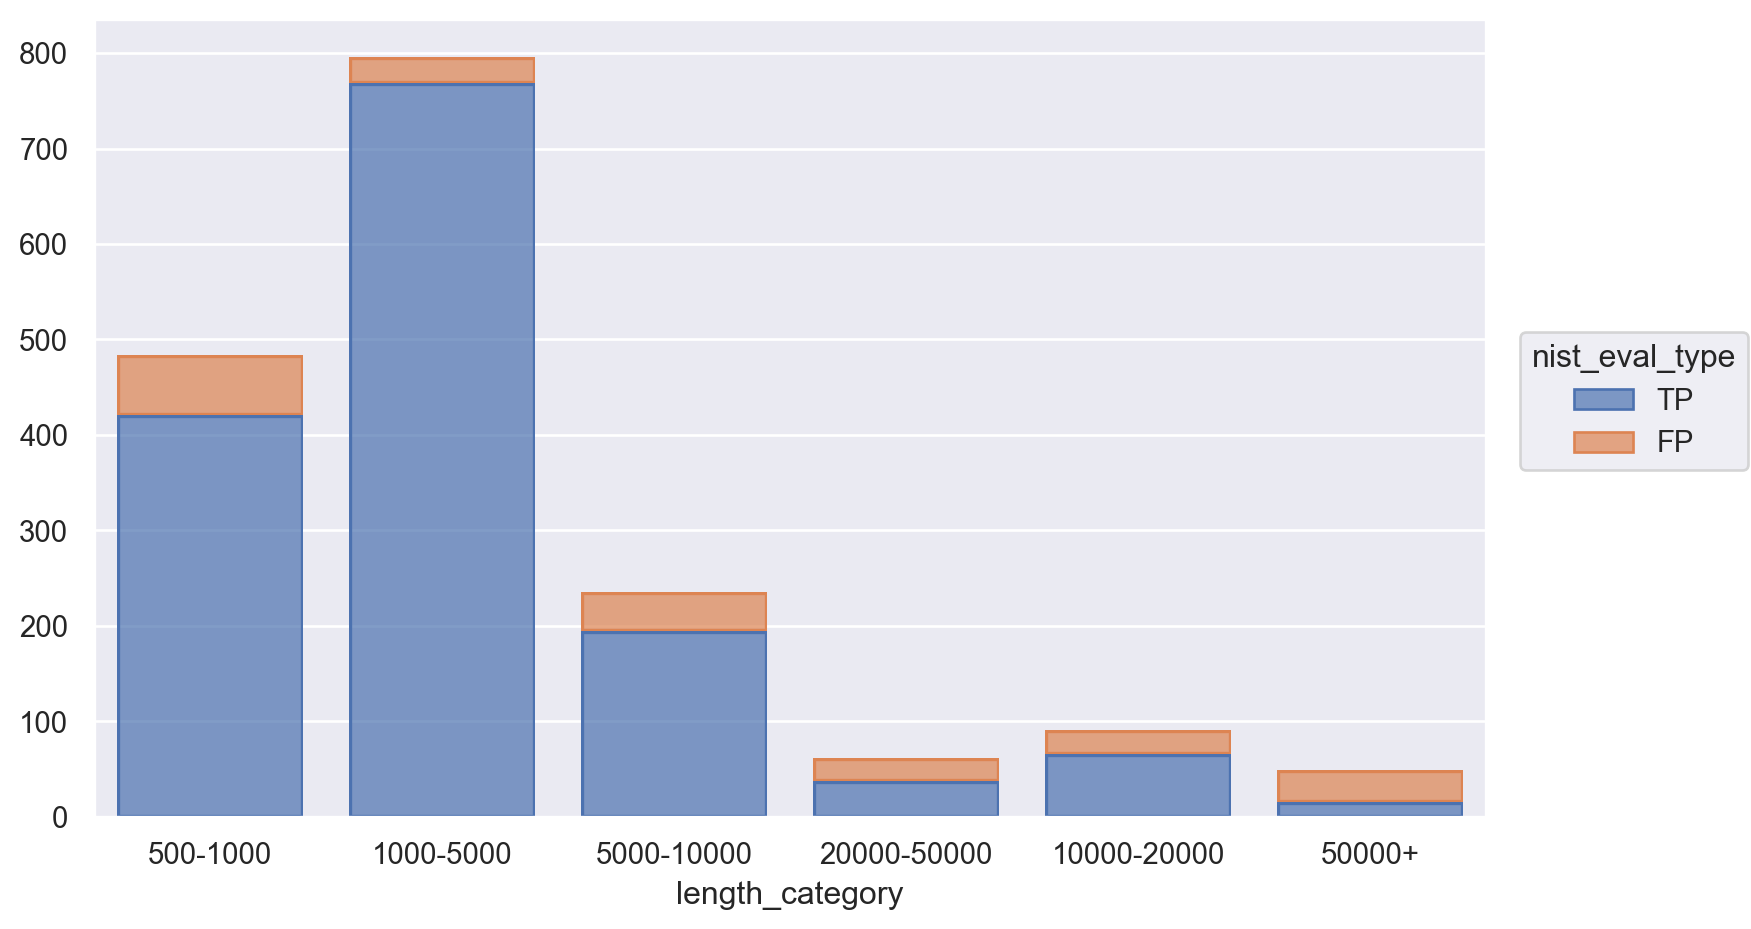

In [18]:
#so.Plot.config.theme["axes.facecolor"] = "white"
p = so.Plot(data=wittyer_attribute_df_DEL, x="length_category", color="nist_eval_type").add(so.Bar(), so.Count(), so.Stack())
p.layout(size=(8, 5))

In [19]:
def sort_key(range_str):
    if '+' in range_str:
        return float('inf')
    low, high = map(int, range_str.split('-'))
    return (low + high) / 2

In [20]:
from matplotlib.patches import Patch

In [21]:
wittyer_attribute_df_DEL.groupby(["caller","nist_eval_type"]).size().unstack(fill_value=0).reset_index()

nist_eval_type,caller,FP,TP
0,DRAGEN v4.2.4,115,881
1,GATK-SV v4.2.6.1,99,622


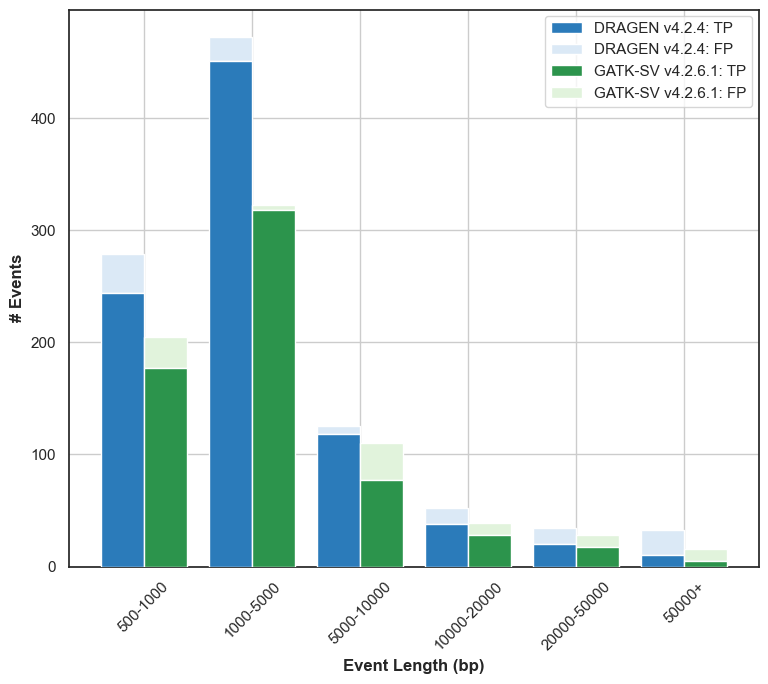

In [22]:
sns.set(style='white')
data = wittyer_attribute_df_DEL
x = 'length_category'
cat = 'caller'
stack = 'nist_eval_type'
palette = [sns.color_palette('Blues')[0], sns.color_palette('Blues')[4], sns.color_palette('Greens')[0], sns.color_palette('Greens')[4]]
plt.subplots(figsize=(8, 7))
ax = plt.gca()
# Count occurrences of each category (x) under the condition of cat and stack
df = data.groupby([cat, x, stack]).size().unstack(fill_value=0).reset_index()

ncat = data[cat].nunique()
nx = data[x].nunique()
nstack = data[stack].nunique()
range_x = np.arange(nx)
width = 0.8 / ncat  # width of each bar

for i, c in enumerate(data[cat].unique()):
    # iterate over categories, i.e., Conditions
    # calculate the location of each bar
    loc_x = (0.5 + i - ncat / 2) * width + range_x
    for j, s in enumerate(['FP', 'TP']):
        for l, loc in zip(sorted(data[x].unique().tolist(), key = sort_key), loc_x):
            # iterate over stacks, i.e., Hosts
            # obtain the height of each stack of a bar
            height = df[(df[cat] == c) & (df[x] == l)][s].values
            #print(loc, l, c, s, height, palette[j + i * nstack])
            if s == 'FP':
                base = df[(df[cat] == c) & (df[x] == l)]['TP'].values
            else:
                base = 0
            ax.bar(x=loc, height=height, bottom=base, width=width, color=palette[j + i * nstack], zorder=10)
            #print(loc, l, c, s, height, palette[j + i * nstack], j + i * nstack)
# make xlabel
ax.set_xticks(range_x)
ax.set_xticklabels(sorted(data[x].unique().tolist(), key = sort_key), rotation=45)
ax.set_ylabel('# Events', fontsize=12, fontweight='bold')  
ax.set_xlabel('Event Length (bp)', fontsize=12, fontweight='bold')
# make legend
plt.legend([Patch(facecolor=palette[i]) for i in [1,0,3,2]],
           [f"{c}: {s}" for c in data[cat].unique() for s in data[stack].unique()],
           bbox_to_anchor=(0.69, 0.99), loc='upper left', borderaxespad=0.)
plt.grid()
#plt.show()
plt.tight_layout()
plt.savefig("NIST_benchmark_comparison_DEL.png", dpi=600)

In [23]:
wittyer_attribute_df_DEL

,interval,svtype,length_category,nist_eval_type,caller
1,chr1:934321-934937,<DEL>,500-1000,TP,DRAGEN v4.2.4
2,chr1:1934923-1935584,<DEL>,500-1000,TP,DRAGEN v4.2.4
3,chr1:1934989-1935584,<DEL>,500-1000,TP,DRAGEN v4.2.4
4,chr1:2122128-2124374,<DEL>,1000-5000,FP,DRAGEN v4.2.4
5,chr1:6006003-6006574,<DEL>,500-1000,FP,DRAGEN v4.2.4
...,...,...,...,...,...
800,chrX:151099695-151102316,<DEL>,1000-5000,TP,GATK-SV v4.2.6.1
801,chrX:155560601-155573607,<DEL>,10000-20000,TP,GATK-SV v4.2.6.1
804,chrY:11687189-11718089,<DEL>,20000-50000,FP,GATK-SV v4.2.6.1
805,chrY:11730989-11749289,<DEL>,10000-20000,FP,GATK-SV v4.2.6.1


In [24]:
# DUP visualization
gatk_sv_DUP_wittyer_attribute_df['caller'] = ['GATK-SV v4.2.6.1']*len(gatk_sv_DUP_wittyer_attribute_df)
dragen_DUP_wittyer_attribute_df['caller'] = ['DRAGEN v4.2.4']*len(dragen_DUP_wittyer_attribute_df)
wittyer_attribute_df_DUP = pd.concat([dragen_DUP_wittyer_attribute_df, gatk_sv_DUP_wittyer_attribute_df])
wittyer_attribute_df_DUP.head()

/var/folders/3p/dhcl5_n93wn0c2pl7dgbqy2c0000gq/T/ipykernel_20516/899237850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gatk_sv_DUP_wittyer_attribute_df['caller'] = ['GATK-SV v4.2.6.1']*len(gatk_sv_DUP_wittyer_attribute_df)
/var/folders/3p/dhcl5_n93wn0c2pl7dgbqy2c0000gq/T/ipykernel_20516/899237850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dragen_DUP_wittyer_attribute_df['caller'] = ['DRAGEN v4.2.4']*len(dragen_DUP_wittyer_attribute_df)


,interval,svtype,length_category,nist_eval_type,caller
0,chr1:789481-224014488,<DUP>,100000+,FP,DRAGEN v4.2.4
6,chr1:13225212-13247040,<DUP>,10000-25000,FP,DRAGEN v4.2.4
11,chr1:16605768-16645359,<DUP>,25000-50000,FP,DRAGEN v4.2.4
12,chr1:16715826-16727637,<DUP>,10000-25000,FP,DRAGEN v4.2.4
13,chr1:16879014-16949283,<DUP>,50000-100000,FP,DRAGEN v4.2.4


-0.2 1000-2500 DRAGEN v4.2.4 [17] 0
0.8 2500-10000 DRAGEN v4.2.4 [14] 0
1.8 10000-25000 DRAGEN v4.2.4 [36] 0
2.8 25000-50000 DRAGEN v4.2.4 [23] 0
3.8 50000-100000 DRAGEN v4.2.4 [15] 0
4.8 100000+ DRAGEN v4.2.4 [10] 0
0.2 1000-2500 GATK-SV v4.2.6.1 [5] 1
1.2 2500-10000 GATK-SV v4.2.6.1 [27] 1
2.2 10000-25000 GATK-SV v4.2.6.1 [27] 1
3.2 25000-50000 GATK-SV v4.2.6.1 [10] 1
4.2 50000-100000 GATK-SV v4.2.6.1 [12] 1
5.2 100000+ GATK-SV v4.2.6.1 [5] 1


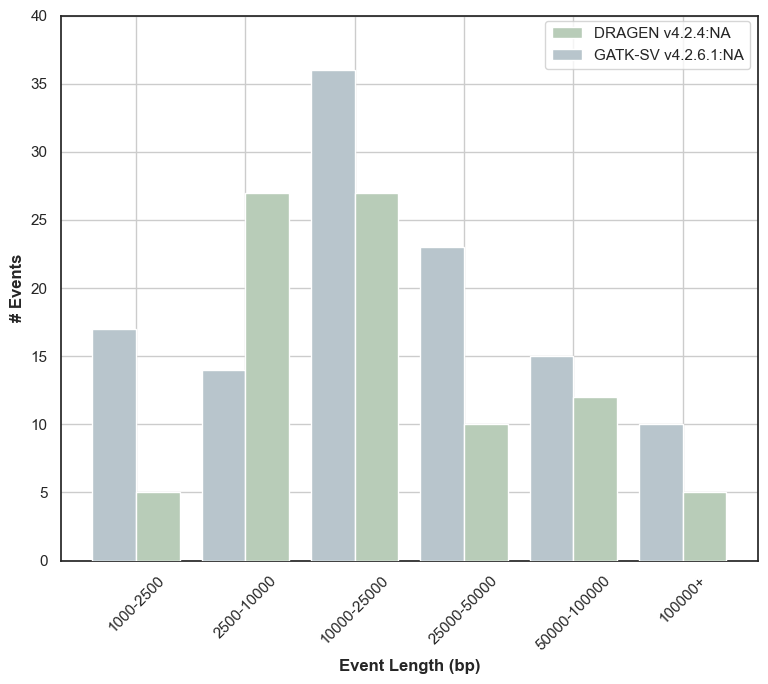

In [25]:
sns.set(style='white')
data = wittyer_attribute_df_DUP
x = 'length_category'
cat = 'caller'
grey_green = (0.7200000000000001, 0.8, 0.7200000000000001)
grey_blue = (0.7200000000000001, 0.7733333333333334, 0.8)
palette = [grey_blue, grey_green]
plt.subplots(figsize=(8, 7))
ax = plt.gca()
# Count occurrences of each category (x) under the condition of cat and stack
df = data.groupby([cat, x]).size().unstack(fill_value=0).reset_index()

ncat = data[cat].nunique()
nx = data[x].nunique()
range_x = np.arange(nx)
width = 0.8 / ncat  # width of each bar

 
for i, c in enumerate(data[cat].unique()):
    # iterate over categories, i.e., Conditions
    # calculate the location of each bar
    loc_x = (0.5 + i - ncat / 2) * width + range_x
    for l, loc in zip(sorted(data[x].unique().tolist(), key = sort_key), loc_x):
        # iterate over stacks, i.e., Hosts
        # obtain the height of each stack of a bar
        height = df[(df[cat] == c)][l].values
        ax.bar(x=loc, height=height, bottom=0, width=width, color=palette[i], zorder=10)
        print(loc, l, c, height, i)
# make xlabel
ax.set_xticks(range_x)
ax.set_xticklabels(sorted(data[x].unique().tolist(), key = sort_key), rotation=45)
ax.set_ylabel('# Events', fontsize=12, fontweight='bold')  
ax.set_xlabel('Event Length (bp)', fontsize=12, fontweight='bold')
ax.set_ylim(0, 40)
# make legend
plt.legend([Patch(facecolor=palette[i]) for i in [1,0]],
           [f"{i}:NA" for i in data[cat].unique()],
           bbox_to_anchor=(0.695, 0.99), loc='upper left', borderaxespad=0.)
plt.grid()
#plt.show()
plt.tight_layout()
plt.savefig("NIST_benchmark_comparison_DUP.png", dpi=600)

In [26]:
# Import T2T-ACE results to perform the same comparison
t2t_ace_dragen_DEL_df = pd.read_csv("/Users/gaoyueya/Documents/GitHub/T2T-ACE/notebooks/HG002_Eval_Output/HG2_DRAGEN_DEL_sum_df.csv")
t2t_ace_gatk_sv_DEL_df = pd.read_csv("/Users/gaoyueya/Documents/GitHub/T2T-ACE/notebooks/HG002_Eval_Output/HG2_GATKSV_DEL_sum_df.csv")
t2t_ace_dragen_DUP_df = pd.read_csv("/Users/gaoyueya/Documents/GitHub/T2T-ACE/notebooks/HG002_Eval_Output/HG002_DRAGEN_DUP_Summary.csv")
t2t_ace_gatk_sv_DUP_df = pd.read_csv("/Users/gaoyueya/Documents/GitHub/T2T-ACE/notebooks/HG002_Eval_Output/HG002_GATKSV_DUP_Summary.csv")

In [27]:
dragen_DEL_ace_eval_dict = {}
for index, row in t2t_ace_dragen_DEL_df.iterrows():
    if row['major_classification'] == "DEL":
        dragen_DEL_ace_eval_dict[row['del_interval']]="TP"
    elif row['major_classification'] == "False DEL":
        dragen_DEL_ace_eval_dict[row['del_interval']]="FP"
    else:
        dragen_DEL_ace_eval_dict[row['del_interval']]="NA"

t2t_ace_dragen_DEL_df['ace_eval'] = t2t_ace_dragen_DEL_df['del_interval'].map(dragen_DEL_ace_eval_dict)

In [28]:
dragen_length_dict = {}
for k,v in dragen_attribute_dict_dict.items():
    dragen_length_dict[k] = v['length_category']
t2t_ace_dragen_DEL_df['length_category'] = t2t_ace_dragen_DEL_df['del_interval'].map(dragen_length_dict)


In [29]:
t2t_ace_dragen_DEL_df['caller'] = ['DRAGEN v4.2.4']*len(t2t_ace_dragen_DEL_df)

In [30]:
gatk_sv_DEL_ace_eval_dict = {}
for index, row in t2t_ace_gatk_sv_DEL_df.iterrows():
    if row['major_classification'] == "DEL":
        gatk_sv_DEL_ace_eval_dict[row['del_interval']]="TP"
    elif row['major_classification'] == "False DEL":
        gatk_sv_DEL_ace_eval_dict[row['del_interval']]="FP"
    else:
        gatk_sv_DEL_ace_eval_dict[row['del_interval']]="NA"

t2t_ace_gatk_sv_DEL_df['ace_eval'] = t2t_ace_gatk_sv_DEL_df['del_interval'].map(gatk_sv_DEL_ace_eval_dict)

In [31]:
gatk_sv_length_dict = {}
for k,v in gatk_sv_attribute_dict_dict.items():
    gatk_sv_length_dict[k] = v['length_category']
t2t_ace_gatk_sv_DEL_df['length_category'] = t2t_ace_gatk_sv_DEL_df['del_interval'].map(gatk_sv_length_dict)
t2t_ace_gatk_sv_DEL_df['caller'] = ['GATK-SV v4.2.6.1']*len(t2t_ace_gatk_sv_DEL_df)

In [32]:
t2t_ace_DEL_df = pd.concat([t2t_ace_dragen_DEL_df, t2t_ace_gatk_sv_DEL_df])
t2t_ace_DEL_df

,del_interval,del_interval_size,flanking_size,left_flanking_interval,right_flanking_interval,left_flanking_hg38_hits,right_flanking_hg38_hits,left_flanking_hg2_hits,right_flanking_hg2_hits,distance_between_flankings,flanking_connection_strand,major_classification,minor_classification,ace_eval,length_category,caller
0,chr1:934321-934937,617,2000,chr1:932321-934321,chr1:934937-936937,1,1,2,2,"[-63, -63]","['POS', 'POS']",DEL,Homozygous DEL,TP,500-1000,DRAGEN v4.2.4
1,chr1:1934923-1935584,662,2000,chr1:1932923-1934923,chr1:1935584-1937584,1,1,2,2,"[659, -1]","['POS', 'POS']",DEL,Heterozygous DEL,TP,500-1000,DRAGEN v4.2.4
2,chr1:1934989-1935584,596,2000,chr1:1932989-1934989,chr1:1935584-1937584,1,1,2,2,"[593, -19]","['POS', 'POS']",DEL,Heterozygous DEL,TP,500-1000,DRAGEN v4.2.4
3,chr1:2122128-2124374,2247,2000,chr1:2120128-2122128,chr1:2124374-2126374,1,1,2,2,"[2648, 1701]","['POS', 'POS']",False DEL,False DEL,FP,1000-5000,DRAGEN v4.2.4
4,chr1:6006003-6006574,572,2000,chr1:6004003-6006003,chr1:6006574-6008574,1,1,2,2,"[1178, 75]","['POS', 'POS']",DEL,Heterozygous DEL,TP,500-1000,DRAGEN v4.2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,chrX:151099695-151102316,2622,2000,chrX:151097695-151099695,chrX:151102316-151104316,1,1,1,1,[-5],['POS'],DEL,Heterozygous DEL,TP,1000-5000,GATK-SV v4.2.6.1
717,chrX:155560601-155573607,13007,3902,chrX:155556699-155560601,chrX:155573607-155577509,1,1,1,1,[3],['POS'],DEL,Heterozygous DEL,TP,10000-20000,GATK-SV v4.2.6.1
718,chrY:11687189-11718089,30901,9270,chrY:11677919-11687189,chrY:11718089-11727359,1,1,1,1,[30932],['POS'],False DEL,False DEL,FP,20000-50000,GATK-SV v4.2.6.1
719,chrY:11730989-11749289,18301,5490,chrY:11725499-11730989,chrY:11749289-11754779,1,1,1,1,[18268],['POS'],False DEL,False DEL,FP,10000-20000,GATK-SV v4.2.6.1


In [33]:
dragen_wittyer_attribute_df 

,interval,svtype,length_category,nist_eval_type
0,chr1:789481-224014488,<DUP>,100000+,FP
1,chr1:934321-934937,<DEL>,500-1000,TP
2,chr1:1934923-1935584,<DEL>,500-1000,TP
3,chr1:1934989-1935584,<DEL>,500-1000,TP
4,chr1:2122128-2124374,<DEL>,1000-5000,FP
...,...,...,...,...
1106,chrY:11002305-11003098,<DEL>,500-1000,TP
1107,chrY:11036143-11037103,<DEL>,500-1000,TP
1108,chrY:11333248-11360005,<DUP>,25000-50000,FP
1109,chrY:56822082-56838588,<DUP>,10000-25000,FP


In [34]:
# Build DEL attribution with wittyer and T2T-ACE evaluation results
dragen_DEL_wittyer_attribute_df['t2t_ace_eval'] = dragen_DEL_wittyer_attribute_df['interval'].map(dragen_DEL_ace_eval_dict)

dragen_DEL_wittyer_attribute_df 

/var/folders/3p/dhcl5_n93wn0c2pl7dgbqy2c0000gq/T/ipykernel_20516/2874956052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dragen_DEL_wittyer_attribute_df['t2t_ace_eval'] = dragen_DEL_wittyer_attribute_df['interval'].map(dragen_DEL_ace_eval_dict)


,interval,svtype,length_category,nist_eval_type,caller,t2t_ace_eval
1,chr1:934321-934937,<DEL>,500-1000,TP,DRAGEN v4.2.4,TP
2,chr1:1934923-1935584,<DEL>,500-1000,TP,DRAGEN v4.2.4,TP
3,chr1:1934989-1935584,<DEL>,500-1000,TP,DRAGEN v4.2.4,TP
4,chr1:2122128-2124374,<DEL>,1000-5000,FP,DRAGEN v4.2.4,FP
5,chr1:6006003-6006574,<DEL>,500-1000,FP,DRAGEN v4.2.4,TP
...,...,...,...,...,...,...
1103,chrY:10809667-10810479,<DEL>,500-1000,TP,DRAGEN v4.2.4,TP
1104,chrY:10871117-10872030,<DEL>,500-1000,TP,DRAGEN v4.2.4,TP
1105,chrY:10969898-10970698,<DEL>,500-1000,TP,DRAGEN v4.2.4,TP
1106,chrY:11002305-11003098,<DEL>,500-1000,TP,DRAGEN v4.2.4,TP


In [35]:
dragen_DEL_nist_attribute_count_df = dragen_DEL_wittyer_attribute_df.groupby(['length_category','nist_eval_type']).size().unstack(fill_value=0).reset_index()
dragen_DEL_nist_attribute_count_df['eval_method'] = ["NIST"]*len(dragen_DEL_nist_attribute_count_df)
dragen_DEL_ace_attribute_count_df = dragen_DEL_wittyer_attribute_df.groupby(['length_category','t2t_ace_eval']).size().unstack(fill_value=0).reset_index()
dragen_DEL_ace_attribute_count_df['eval_method'] = ["T2T-ACE"]*len(dragen_DEL_ace_attribute_count_df)
dragen_DEL_attribute_count_df = pd.concat([dragen_DEL_nist_attribute_count_df, dragen_DEL_ace_attribute_count_df])
dragen_DEL_attribute_count_df

,length_category,FP,TP,eval_method,NA
0,1000-5000,22,451,NIST,NaN
1,10000-20000,14,38,NIST,NaN
2,20000-50000,14,20,NIST,NaN
3,500-1000,35,244,NIST,NaN
4,5000-10000,7,118,NIST,NaN
5,50000+,23,10,NIST,NaN
0,1000-5000,9,463,T2T-ACE,1.0
1,10000-20000,16,35,T2T-ACE,1.0
2,20000-50000,9,22,T2T-ACE,3.0
3,500-1000,15,263,T2T-ACE,1.0


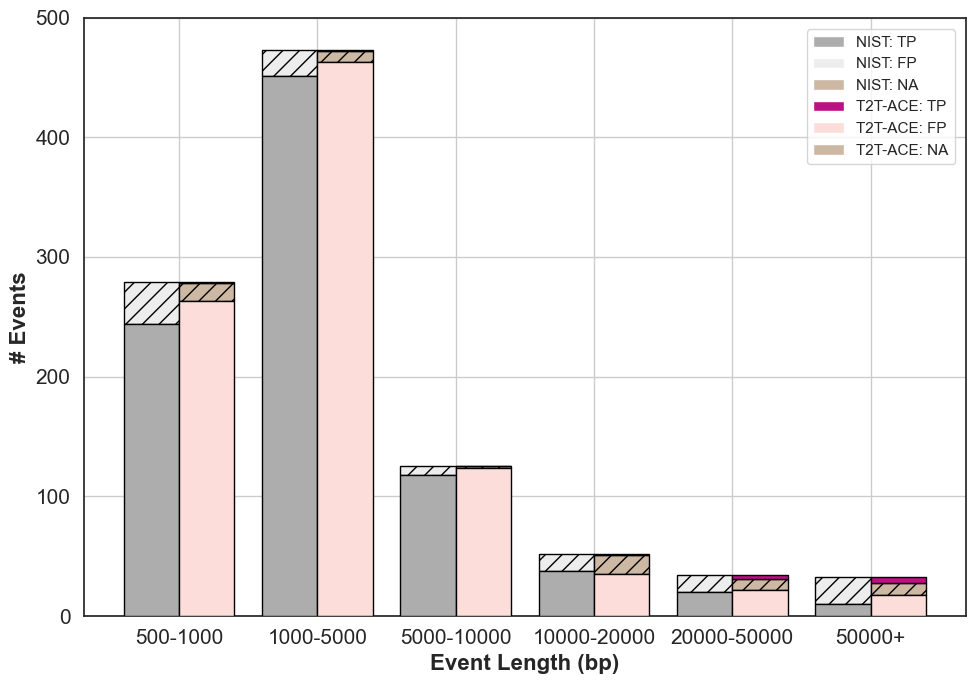

In [36]:
sns.set(style='white')
data = dragen_DEL_attribute_count_df
x = 'length_category'
cat = 'eval_method'

grey_orange = (0.8, 0.7200000000000001, 0.6400000000000001)
grey_blue = (0.7200000000000001, 0.7733333333333334, 0.8)
palette = [sns.color_palette('Greys')[0], sns.color_palette('Greys')[2], grey_orange, sns.color_palette('RdPu')[0], sns.color_palette('RdPu')[4], grey_orange]
plt.subplots(figsize=(10, 7))
ax = plt.gca()


ncat = data[cat].nunique()
nx = data[x].nunique()
range_x = np.arange(nx)
width = 0.8 / ncat  # width of each bar


for i, c in enumerate(data[cat].unique()):
    # iterate over categories, i.e., Conditions
    # calculate the location of each bar
    loc_x = (0.5 + i - ncat / 2) * width + range_x
    for j, s in enumerate(['FP', 'TP', 'NA']):
        for l, loc in zip(sorted(data[x].unique().tolist(), key = sort_key), loc_x):
            # iterate over stacks
            # obtain the height of each stack of a bar
            height = data[(data[cat] == c) & (data[x] == l)][s].values
            if s == 'FP':
                base = data[(data[cat] == c) & (data[x] == l)]['TP'].values
                ax.bar(x=loc, height=height, bottom=base, width=width, color=palette[j + i * nstack], zorder=10, hatch="//", edgecolor='black')
            elif s == 'NA':
                base = data[(data[cat] == c) & (data[x] == l)]['TP'].values + data[(data[cat] == c) & (data[x] == l)]['FP'].values
                ax.bar(x=loc, height=height, bottom=base, width=width, color=palette[j + i * nstack], zorder=10, edgecolor='black')
            else:
                base = 0
                ax.bar(x=loc, height=height, bottom=base, width=width, color=palette[j + i * nstack], zorder=10, edgecolor='black')

#             print(loc, l, c, s, height, j + i * nstack)
# make xlabel
ax.set_xticks(range_x)
ax.set_xticklabels(sorted(data[x].unique().tolist(), key = sort_key), rotation=0)
ax.set_ylabel('# Events', fontsize=16, fontweight='bold')  
ax.set_xlabel('Event Length (bp)', fontsize=16, fontweight='bold')
ax.set_ylim(0,500)
ax.tick_params(labelsize=15)
# make legend
plt.legend([Patch(facecolor=palette[i]) for i in [1,0,2,4,3,5]],
           [f"{c}: {s}" for c in data[cat].unique() for s in ['TP', 'FP', 'NA']],
           bbox_to_anchor=(0.82, 0.98), loc='upper left', borderaxespad=0.)
plt.grid()
#plt.show()
plt.tight_layout()
plt.savefig("T2T-ACE_NIST_comparison_DEL.png", dpi=600)

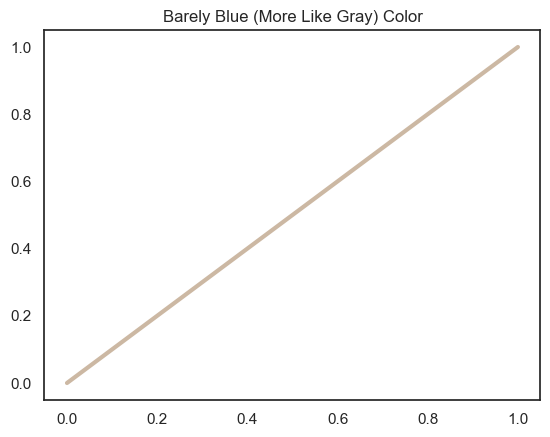

In [37]:
    # Get darker color for the barely green and barely blue color
import colorsys

# Define the hue, saturation, and value for the base green color
base_hue = 30  # Green hue in HSV color space 120; Blue hue in HSV color space 240
base_saturation = 0.2  # Very low saturation for a barely green color
base_value = 0.8  # Reduced brightness

# Convert HSV to RGB
rgb_color = colorsys.hsv_to_rgb(base_hue / 360, base_saturation, base_value)

# Plot a sample using the color
plt.plot([0, 1], [0, 1], color=rgb_color, lw=3)
plt.title('Barely Blue (More Like Gray) Color')

plt.savefig("Color_test.png", dpi=100)


In [38]:
 rgb_color

(0.8, 0.7200000000000001, 0.6400000000000001)

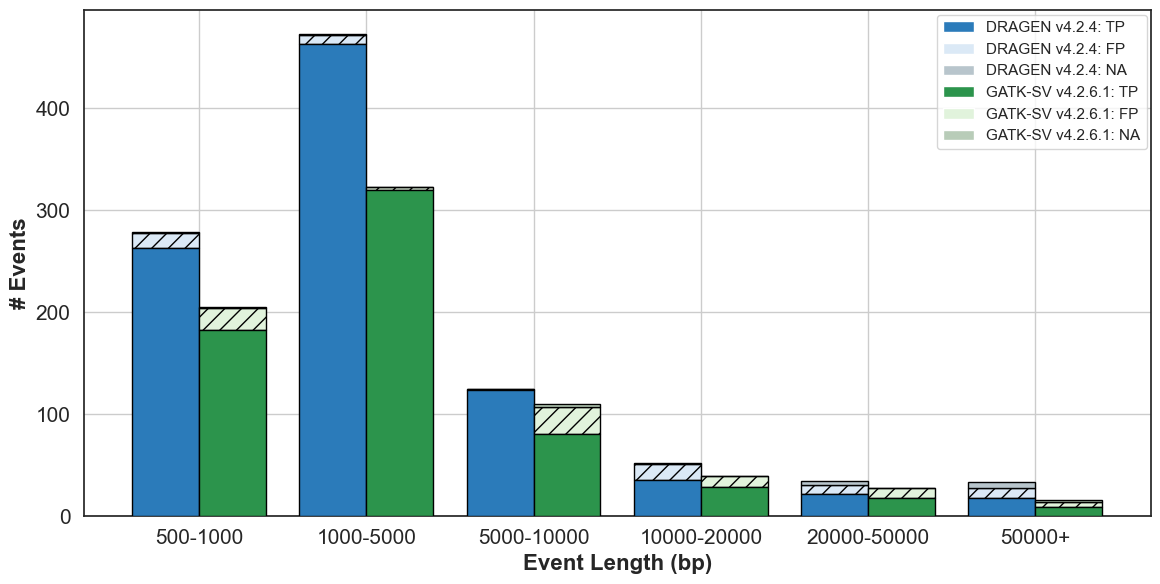

In [39]:
sns.set(style='white')
data = t2t_ace_DEL_df
x = 'length_category'
cat = 'caller'
stack = 'ace_eval'
grey_green = (0.7200000000000001, 0.8, 0.7200000000000001)
grey_blue = (0.7200000000000001, 0.7733333333333334, 0.8)
palette = [sns.color_palette('Blues')[0], sns.color_palette('Blues')[4], grey_blue, sns.color_palette('Greens')[0], sns.color_palette('Greens')[4], grey_green]
plt.subplots(figsize=(12, 6))
ax = plt.gca()
# Count occurrences of each category (x) under the condition of cat and stack
df = data.groupby([cat, x, stack]).size().unstack(fill_value=0).reset_index()

ncat = data[cat].nunique()
nx = data[x].nunique()
nstack = data[stack].nunique()
range_x = np.arange(nx)
width = 0.8 / ncat  # width of each bar


for i, c in enumerate(data[cat].unique()):
    # iterate over categories, i.e., Conditions
    # calculate the location of each bar
    loc_x = (0.5 + i - ncat / 2) * width + range_x
    for j, s in enumerate(['FP', 'TP', 'NA']):
        for l, loc in zip(sorted(data[x].unique().tolist(), key = sort_key), loc_x):
            # iterate over stacks, i.e., Hosts
            # obtain the height of each stack of a bar
            height = df[(df[cat] == c) & (df[x] == l)][s].values
            if s == 'FP':
                base = df[(df[cat] == c) & (df[x] == l)]['TP'].values
                ax.bar(x=loc, height=height, bottom=base, width=width, color=palette[j + i * nstack], zorder=10, hatch="//", edgecolor='black')

            elif s == 'NA':
                base = df[(df[cat] == c) & (df[x] == l)]['TP'].values + df[(df[cat] == c) & (df[x] == l)]['FP'].values
                ax.bar(x=loc, height=height, bottom=base, width=width, color=palette[j + i * nstack], zorder=10, edgecolor='black')

            else:
                base = 0
                ax.bar(x=loc, height=height, bottom=base, width=width, color=palette[j + i * nstack], zorder=10, edgecolor='black')
            #print(loc, l, c, s, height, palette[j + i * nstack], j + i * nstack)
# make xlabel
ax.set_xticks(range_x)
ax.set_xticklabels(sorted(data[x].unique().tolist(), key = sort_key), rotation=0)
ax.set_ylabel('# Events', fontsize=16, fontweight='bold')  
ax.set_xlabel('Event Length (bp)', fontsize=16, fontweight='bold')
ax.tick_params(labelsize=15)
# make legend
plt.legend([Patch(facecolor=palette[i]) for i in [1,0,2,4,3,5]],
           [f"{c}: {s}" for c in data[cat].unique() for s in data[stack].unique()],
           bbox_to_anchor=(0.80, 0.99), loc='upper left', borderaxespad=0.)
plt.grid()
#plt.show()
plt.tight_layout()
plt.savefig("T2T-ACE_comparison_DEL.png", dpi=600)

In [40]:
dragen_DUP_ace_eval_dict = {}
for index, row in t2t_ace_dragen_DUP_df.iterrows():
    if row['original_dup_interval_major_classification'] == "Duplication":
        dragen_DUP_ace_eval_dict[row['interval']]="TP"
    elif row['original_dup_interval_major_classification'] == "Unknown":
        dragen_DUP_ace_eval_dict[row['interval']]="NA"
    else:
        dragen_DUP_ace_eval_dict[row['interval']]="FP"

t2t_ace_dragen_DUP_df['ace_eval'] = t2t_ace_dragen_DUP_df['interval'].map(dragen_DUP_ace_eval_dict)
t2t_ace_dragen_DUP_df.head()

,interval,dup_interval_size,original_hg38_hit_count,original_hg2_hit_count,original_hg2_mat_hit_count,original_hg2_pat_hit_count,original_dup_interval_major_classification,original_dup_interval_sub_classification,original_dup_interval_contain_big_gap,corrected_interval,...,expanded_length,corrected_hg38_hit_count,corrected_hg2_hit_count,corrected_hg2_mat_hit_count,corrected_hg2_pat_hit_count,corrected_dup_interval_major_classification,corrected_dup_interval_sub_classification,corrected_pos_accuracy,corrected_end_accuracy,ace_eval
0,chr1:789481-224014488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FP
1,chr1:13225212-13247040,21829.0,1.0,3.0,2.0,1.0,Duplication,Maternal Heterozygous Duplication,False,chr1:13220889-13262322,...,19605.0,1.0,3.0,2.0,1.0,Duplication,Maternal Heterozygous Duplication,1.0,0.0,TP
2,chr1:16605768-16645359,39592.0,1.0,5.0,2.0,3.0,Duplication,Homozygous Duplication,False,chr1:16558260-16660888,...,63037.0,1.0,5.0,2.0,3.0,Duplication,Homozygous Duplication,0.0,0.0,TP
3,chr1:16715826-16727637,11812.0,1.0,5.0,2.0,3.0,Duplication,Homozygous Duplication,False,chr1:16680842-16733508,...,40855.0,1.0,5.0,2.0,3.0,Duplication,Homozygous Duplication,1.0,0.0,TP
4,chr1:16879014-16949283,70270.0,1.0,4.0,2.0,2.0,Duplication,Homozygous Duplication,False,chr1:16859848-16954363,...,24246.0,1.0,4.0,2.0,2.0,Duplication,Homozygous Duplication,1.0,1.0,TP


In [41]:
gatk_sv_DUP_ace_eval_dict = {}
for index, row in t2t_ace_gatk_sv_DUP_df.iterrows():
    if row['original_dup_interval_major_classification'] == "Duplication":
        gatk_sv_DUP_ace_eval_dict[row['interval']]="TP"
    elif row['original_dup_interval_major_classification'] == "Unknown":
        gatk_sv_DUP_ace_eval_dict[row['interval']]="NA"
    else:
        gatk_sv_DUP_ace_eval_dict[row['interval']]="FP"

t2t_ace_gatk_sv_DUP_df['ace_eval'] = t2t_ace_gatk_sv_DUP_df['interval'].map(gatk_sv_DUP_ace_eval_dict)
t2t_ace_gatk_sv_DUP_df.head()

,interval,dup_interval_size,original_hg38_hit_count,original_hg2_hit_count,original_hg2_mat_hit_count,original_hg2_pat_hit_count,original_dup_interval_major_classification,original_dup_interval_sub_classification,original_dup_interval_contain_big_gap,corrected_interval,...,expanded_length,corrected_hg38_hit_count,corrected_hg2_hit_count,corrected_hg2_mat_hit_count,corrected_hg2_pat_hit_count,corrected_dup_interval_major_classification,corrected_dup_interval_sub_classification,corrected_pos_accuracy,corrected_end_accuracy,ace_eval
0,chr1:16851164-16949164,98001,1,4,2,2,Duplication,Homozygous Duplication,False,chr1:16859848-16954363,...,-3485.0,1.0,4.0,2.0,2.0,Duplication,Homozygous Duplication,1.0,1.0,TP
1,chr1:25329164-25335164,6001,1,4,2,2,Duplication,Homozygous Duplication,False,chr1:25329164-25338358,...,3194.0,2.0,4.0,2.0,2.0,Copy Neutral,Biallelic Copy Neutral,0.0,1.0,TP
2,chr1:120807836-120813836,6001,5,6,3,3,Unknown,Unknown,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA
3,chr1:149190101-149217001,26901,2,4,2,2,Copy Neutral,Biallelic Copy Neutral,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FP
4,chr1:248409001-248436365,27365,1,3,2,1,Duplication,Maternal Heterozygous Duplication,False,chr1:248408713-248444577,...,8500.0,1.0,3.0,2.0,1.0,Duplication,Maternal Heterozygous Duplication,1.0,1.0,TP


In [42]:
t2t_ace_dragen_DUP_df['length_category'] = t2t_ace_dragen_DUP_df['interval'].map(dragen_length_dict)
t2t_ace_dragen_DUP_df['caller'] = ['DRAGEN v4.2.4']*len(t2t_ace_dragen_DUP_df)
t2t_ace_gatk_sv_DUP_df['length_category'] = t2t_ace_gatk_sv_DUP_df['interval'].map(gatk_sv_length_dict)
t2t_ace_gatk_sv_DUP_df['caller'] = ['GATK-SV v4.2.6.1']*len(t2t_ace_gatk_sv_DUP_df)
t2t_ace_DUP_df = pd.concat([t2t_ace_dragen_DUP_df, t2t_ace_gatk_sv_DUP_df])
t2t_ace_DUP_df

,interval,dup_interval_size,original_hg38_hit_count,original_hg2_hit_count,original_hg2_mat_hit_count,original_hg2_pat_hit_count,original_dup_interval_major_classification,original_dup_interval_sub_classification,original_dup_interval_contain_big_gap,corrected_interval,...,corrected_hg2_hit_count,corrected_hg2_mat_hit_count,corrected_hg2_pat_hit_count,corrected_dup_interval_major_classification,corrected_dup_interval_sub_classification,corrected_pos_accuracy,corrected_end_accuracy,ace_eval,length_category,caller
0,chr1:789481-224014488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FP,100000+,DRAGEN v4.2.4
1,chr1:13225212-13247040,21829.0,1.0,3.0,2.0,1.0,Duplication,Maternal Heterozygous Duplication,False,chr1:13220889-13262322,...,3.0,2.0,1.0,Duplication,Maternal Heterozygous Duplication,1.0,0.0,TP,10000-25000,DRAGEN v4.2.4
2,chr1:16605768-16645359,39592.0,1.0,5.0,2.0,3.0,Duplication,Homozygous Duplication,False,chr1:16558260-16660888,...,5.0,2.0,3.0,Duplication,Homozygous Duplication,0.0,0.0,TP,25000-50000,DRAGEN v4.2.4
3,chr1:16715826-16727637,11812.0,1.0,5.0,2.0,3.0,Duplication,Homozygous Duplication,False,chr1:16680842-16733508,...,5.0,2.0,3.0,Duplication,Homozygous Duplication,1.0,0.0,TP,10000-25000,DRAGEN v4.2.4
4,chr1:16879014-16949283,70270.0,1.0,4.0,2.0,2.0,Duplication,Homozygous Duplication,False,chr1:16859848-16954363,...,4.0,2.0,2.0,Duplication,Homozygous Duplication,1.0,1.0,TP,50000-100000,DRAGEN v4.2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,chr22:50796401-50807366,10966.0,6.0,6.0,3.0,3.0,Unknown,Unknown,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,10000-25000,GATK-SV v4.2.6.1
82,chrX:144125382-144145382,20001.0,2.0,3.0,2.0,1.0,Unknown,Unknown,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,10000-25000,GATK-SV v4.2.6.1
83,chrX:144167382-144175382,8001.0,2.0,3.0,2.0,1.0,Unknown,Unknown,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,2500-10000,GATK-SV v4.2.6.1
84,chrY:5605389-5613389,8001.0,1.0,1.0,0.0,1.0,Copy Neutral,Paternal Copy Neutral,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FP,2500-10000,GATK-SV v4.2.6.1


In [43]:
t2t_ace_DUP_df['length_category'].value_counts()

length_category
10000-25000     63
2500-10000      41
25000-50000     33
50000-100000    27
1000-2500       22
100000+         15
Name: count, dtype: int64

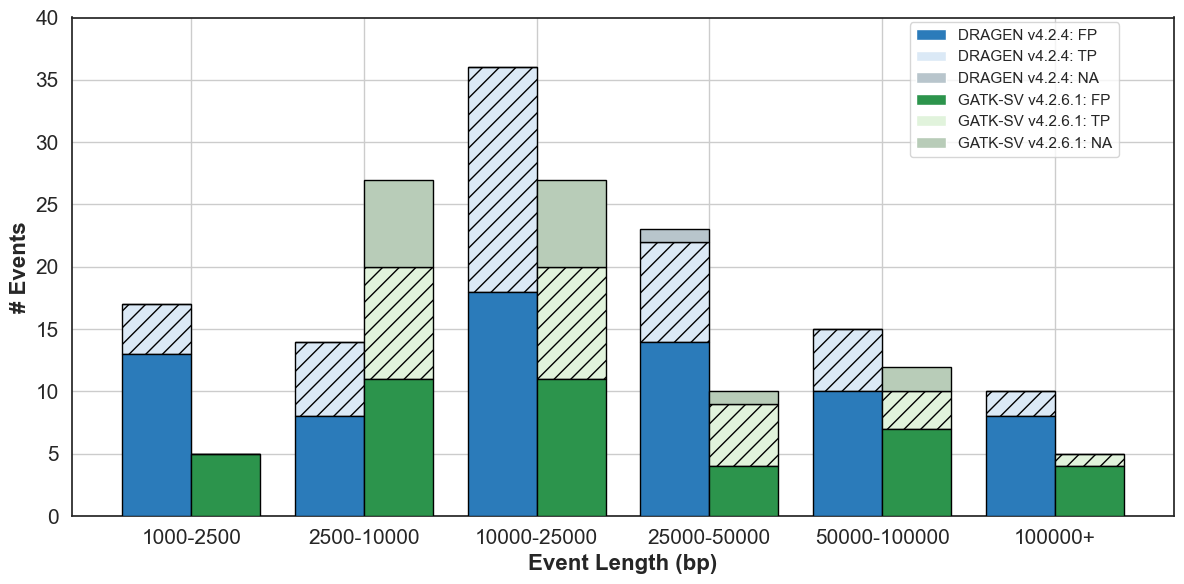

In [44]:
sns.set(style='white')
data = t2t_ace_DUP_df
x = 'length_category'
cat = 'caller'
stack = 'ace_eval'
grey_green = (0.7200000000000001, 0.8, 0.7200000000000001)
grey_blue = (0.7200000000000001, 0.7733333333333334, 0.8)
palette = [sns.color_palette('Blues')[0], sns.color_palette('Blues')[4], grey_blue, sns.color_palette('Greens')[0], sns.color_palette('Greens')[4], grey_green]
plt.subplots(figsize=(12, 6))
ax = plt.gca()
# Count occurrences of each category (x) under the condition of cat and stack
df = data.groupby([cat, x, stack]).size().unstack(fill_value=0).reset_index()

ncat = data[cat].nunique()
nx = data[x].nunique()
nstack = data[stack].nunique()
range_x = np.arange(nx)
width = 0.8 / ncat  # width of each bar


for i, c in enumerate(data[cat].unique()):
    # iterate over categories, i.e., Conditions
    # calculate the location of each bar
    loc_x = (0.5 + i - ncat / 2) * width + range_x
    for j, s in enumerate(['FP', 'TP', 'NA']):
        for l, loc in zip(sorted(data[x].unique().tolist(), key = sort_key), loc_x):
            # iterate over stacks, i.e., Hosts
            # obtain the height of each stack of a bar
            height = df[(df[cat] == c) & (df[x] == l)][s].values
            if s == 'FP':
                base = df[(df[cat] == c) & (df[x] == l)]['TP'].values
                ax.bar(x=loc, height=height, bottom=base, width=width, color=palette[j + i * nstack], zorder=10, hatch="//", edgecolor='black')
            elif s == 'NA':
                base = df[(df[cat] == c) & (df[x] == l)]['TP'].values + df[(df[cat] == c) & (df[x] == l)]['FP'].values
                ax.bar(x=loc, height=height, bottom=base, width=width, color=palette[j + i * nstack], zorder=10, edgecolor='black')
            else:
                base = 0
                ax.bar(x=loc, height=height, bottom=base, width=width, color=palette[j + i * nstack], zorder=10, edgecolor='black')
            #print(loc, l, c, s, height, palette[j + i * nstack], j + i * nstack)
# make xlabel
ax.set_xticks(range_x)
ax.set_xticklabels(sorted(data[x].unique().tolist(), key = sort_key), rotation=0)
ax.set_ylabel('# Events', fontsize=16, fontweight='bold')  
ax.set_xlabel('Event Length (bp)', fontsize=16, fontweight='bold')
ax.set_ylim(0, 40)
ax.tick_params(labelsize=15)

# make legend
plt.legend([Patch(facecolor=palette[i]) for i in [1,0,2,4,3,5]],
           [f"{c}: {s}" for c in data[cat].unique() for s in data[stack].unique()],
           bbox_to_anchor=(0.76, 0.99), loc='upper left', borderaxespad=0.)
plt.grid()
#plt.show()
plt.tight_layout()
plt.savefig("T2T-ACE_comparison_DUP.png", dpi=600)

In [45]:
wittyer_attribute_df_DEL[wittyer_attribute_df_DEL['interval'] == 'chr4:107142040-107154888']

,interval,svtype,length_category,nist_eval_type,caller
199,chr4:107142040-107154888,<DEL>,10000-20000,TP,GATK-SV v4.2.6.1


In [46]:
t2t_ace_DEL_df[t2t_ace_DEL_df['ace_eval'] == 'FP'].tail()

,del_interval,del_interval_size,flanking_size,left_flanking_interval,right_flanking_interval,left_flanking_hg38_hits,right_flanking_hg38_hits,left_flanking_hg2_hits,right_flanking_hg2_hits,distance_between_flankings,flanking_connection_strand,major_classification,minor_classification,ace_eval,length_category,caller
682,chr22:11784630-11829001,44372,13311,chr22:11771319-11784630,chr22:11829001-11842312,3,3,5,2,"[81947, 81948, 2069049, 2189404, 6305264]","['POS', 'POS', 'NEG', 'NEG', 'POS']",False DEL,False DEL,FP,20000-50000,GATK-SV v4.2.6.1
683,chr22:11807708-11809890,2183,2000,chr22:11805708-11807708,chr22:11809890-11811890,2,2,2,2,"[2182, 2182]","['POS', 'POS']",False DEL,False DEL,FP,1000-5000,GATK-SV v4.2.6.1
718,chrY:11687189-11718089,30901,9270,chrY:11677919-11687189,chrY:11718089-11727359,1,1,1,1,[30932],['POS'],False DEL,False DEL,FP,20000-50000,GATK-SV v4.2.6.1
719,chrY:11730989-11749289,18301,5490,chrY:11725499-11730989,chrY:11749289-11754779,1,1,1,1,[18268],['POS'],False DEL,False DEL,FP,10000-20000,GATK-SV v4.2.6.1
720,chrY:13114124-13120389,6266,2000,chrY:13112124-13114124,chrY:13120389-13122389,1,2,1,2,[4761],['POS'],False DEL,False DEL,FP,5000-10000,GATK-SV v4.2.6.1


In [47]:
dragen_DUP_wittyer_attribute_df['t2t_ace_eval'] = dragen_DUP_wittyer_attribute_df['interval'].map(dragen_DUP_ace_eval_dict)
dragen_DUP_nist_attribute_count_df = dragen_DUP_wittyer_attribute_df.groupby(['length_category','nist_eval_type']).size().unstack(fill_value=0).reset_index()

/var/folders/3p/dhcl5_n93wn0c2pl7dgbqy2c0000gq/T/ipykernel_20516/1720085844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dragen_DUP_wittyer_attribute_df['t2t_ace_eval'] = dragen_DUP_wittyer_attribute_df['interval'].map(dragen_DUP_ace_eval_dict)


In [48]:
dragen_DUP_wittyer_attribute_df['t2t_ace_eval'] = dragen_DUP_wittyer_attribute_df['interval'].map(dragen_DUP_ace_eval_dict)
dragen_DUP_wittyer_attribute_df.head()

/var/folders/3p/dhcl5_n93wn0c2pl7dgbqy2c0000gq/T/ipykernel_20516/2345610244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dragen_DUP_wittyer_attribute_df['t2t_ace_eval'] = dragen_DUP_wittyer_attribute_df['interval'].map(dragen_DUP_ace_eval_dict)


,interval,svtype,length_category,nist_eval_type,caller,t2t_ace_eval
0,chr1:789481-224014488,<DUP>,100000+,FP,DRAGEN v4.2.4,FP
6,chr1:13225212-13247040,<DUP>,10000-25000,FP,DRAGEN v4.2.4,TP
11,chr1:16605768-16645359,<DUP>,25000-50000,FP,DRAGEN v4.2.4,TP
12,chr1:16715826-16727637,<DUP>,10000-25000,FP,DRAGEN v4.2.4,TP
13,chr1:16879014-16949283,<DUP>,50000-100000,FP,DRAGEN v4.2.4,TP


In [49]:
dragen_DUP_wittyer_attribute_df['nist_eval_type'] = ["NA"]*len(dragen_DUP_wittyer_attribute_df)

/var/folders/3p/dhcl5_n93wn0c2pl7dgbqy2c0000gq/T/ipykernel_20516/3825541244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dragen_DUP_wittyer_attribute_df['nist_eval_type'] = ["NA"]*len(dragen_DUP_wittyer_attribute_df)


In [50]:
dragen_DUP_nist_attribute_count_df = dragen_DUP_wittyer_attribute_df.groupby(['length_category','nist_eval_type']).size().unstack(fill_value=0).reset_index()
dragen_DUP_nist_attribute_count_df['eval_method'] = ["NIST"]*len(dragen_DUP_nist_attribute_count_df)
dragen_DUP_ace_attribute_count_df = dragen_DUP_wittyer_attribute_df.groupby(['length_category','t2t_ace_eval']).size().unstack(fill_value=0).reset_index()
dragen_DUP_ace_attribute_count_df['eval_method'] = ["T2T-ACE"]*len(dragen_DUP_ace_attribute_count_df)
dragen_DUP_attribute_count_df = pd.concat([dragen_DUP_nist_attribute_count_df, dragen_DUP_ace_attribute_count_df])
dragen_DUP_attribute_count_df

,length_category,NA,eval_method,FP,TP
0,1000-2500,17,NIST,NaN,NaN
1,10000-25000,36,NIST,NaN,NaN
2,100000+,10,NIST,NaN,NaN
3,2500-10000,14,NIST,NaN,NaN
4,25000-50000,23,NIST,NaN,NaN
5,50000-100000,15,NIST,NaN,NaN
0,1000-2500,0,T2T-ACE,4.0,13.0
1,10000-25000,0,T2T-ACE,18.0,18.0
2,100000+,0,T2T-ACE,2.0,8.0
3,2500-10000,0,T2T-ACE,6.0,8.0


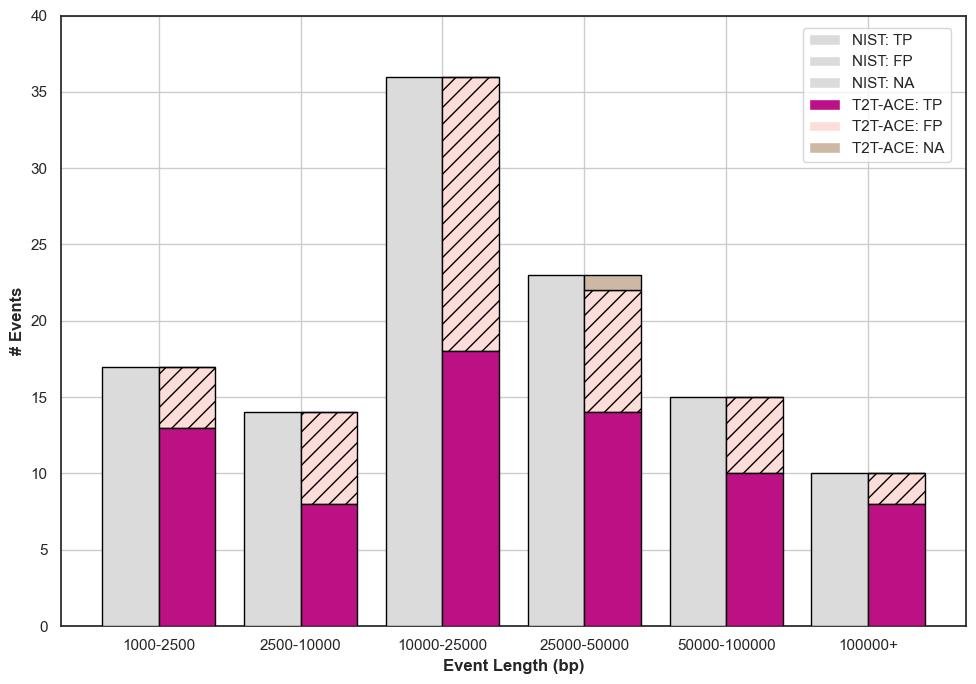

In [51]:
sns.set(style='white')
data = dragen_DUP_attribute_count_df
x = 'length_category'
cat = 'eval_method'

grey_orange = (0.8, 0.7200000000000001, 0.6400000000000001)
grey_blue = (0.7200000000000001, 0.7733333333333334, 0.8)
palette = [sns.color_palette('gist_grey')[5], sns.color_palette('gist_grey')[5], sns.color_palette('gist_grey')[5], sns.color_palette('RdPu')[0], sns.color_palette('RdPu')[4], grey_orange]
plt.subplots(figsize=(10, 7))
ax = plt.gca()


ncat = data[cat].nunique()
nx = data[x].nunique()
range_x = np.arange(nx)
width = 0.8 / ncat  # width of each bar


for i, c in enumerate(data[cat].unique()):
    # iterate over categories, i.e., Conditions
    # calculate the location of each bar
    loc_x = (0.5 + i - ncat / 2) * width + range_x
    for j, s in enumerate(['FP', 'TP', 'NA']):
        for l, loc in zip(sorted(data[x].unique().tolist(), key = sort_key), loc_x):
            # iterate over stacks
            # obtain the height of each stack of a bar
            height = data[(data[cat] == c) & (data[x] == l)][s].values
            if s == 'FP':
                base = data[(data[cat] == c) & (data[x] == l)]['TP'].values
                ax.bar(x=loc, height=height, bottom=base, width=width, color=palette[j + i * nstack], zorder=10, hatch="//", edgecolor='black')
            elif s == 'NA' and c == "T2T-ACE":
                base = data[(data[cat] == c) & (data[x] == l)]['TP'].values + data[(data[cat] == c) & (data[x] == l)]['FP'].values
                ax.bar(x=loc, height=height, bottom=base, width=width, color=palette[j + i * nstack], zorder=10, edgecolor='black')
            else:
                base = 0
                ax.bar(x=loc, height=height, bottom=base, width=width, color=palette[j + i * nstack], zorder=10, edgecolor='black')

#             print(loc, l, c, s, height, j + i * nstack)
# make xlabel
ax.set_xticks(range_x)
ax.set_xticklabels(sorted(data[x].unique().tolist(), key = sort_key), rotation=0)
ax.set_ylabel('# Events', fontsize=12, fontweight='bold')  
ax.set_xlabel('Event Length (bp)', fontsize=12, fontweight='bold')
ax.set_ylim(0,40)
# make legend
plt.legend([Patch(facecolor=palette[i]) for i in [1,0,2,4,3,5]],
           [f"{c}: {s}" for c in data[cat].unique() for s in ['TP', 'FP', 'NA']],
           bbox_to_anchor=(0.82, 0.98), loc='upper left', borderaxespad=0.)
plt.grid()
#plt.show()
plt.tight_layout()
plt.savefig("T2T-ACE_NIST_comparison_DUP.png", dpi=600)

In [57]:
dragen_DEL_attribute_count_df.head()

,length_category,FP,TP,eval_method,NA
0,1000-5000,22,451,NIST,NaN
1,10000-20000,14,38,NIST,NaN
2,20000-50000,14,20,NIST,NaN
3,500-1000,35,244,NIST,NaN
4,5000-10000,7,118,NIST,NaN


In [58]:
dragen_DEL_wittyer_attribute_df

,interval,svtype,length_category,nist_eval_type,caller,t2t_ace_eval
1,chr1:934321-934937,<DEL>,500-1000,TP,DRAGEN v4.2.4,TP
2,chr1:1934923-1935584,<DEL>,500-1000,TP,DRAGEN v4.2.4,TP
3,chr1:1934989-1935584,<DEL>,500-1000,TP,DRAGEN v4.2.4,TP
4,chr1:2122128-2124374,<DEL>,1000-5000,FP,DRAGEN v4.2.4,FP
5,chr1:6006003-6006574,<DEL>,500-1000,FP,DRAGEN v4.2.4,TP
...,...,...,...,...,...,...
1103,chrY:10809667-10810479,<DEL>,500-1000,TP,DRAGEN v4.2.4,TP
1104,chrY:10871117-10872030,<DEL>,500-1000,TP,DRAGEN v4.2.4,TP
1105,chrY:10969898-10970698,<DEL>,500-1000,TP,DRAGEN v4.2.4,TP
1106,chrY:11002305-11003098,<DEL>,500-1000,TP,DRAGEN v4.2.4,TP


In [59]:
dragen_DEL_disagree_df = dragen_DEL_wittyer_attribute_df[(dragen_DEL_wittyer_attribute_df['svtype'] == '<DEL>')&(dragen_DEL_wittyer_attribute_df['t2t_ace_eval'] == 'TP')&(dragen_DEL_wittyer_attribute_df['nist_eval_type'] == 'FP')]
dragen_DEL_disagree_df

,interval,svtype,length_category,nist_eval_type,caller,t2t_ace_eval
5,chr1:6006003-6006574,<DEL>,500-1000,FP,DRAGEN v4.2.4,TP
7,chr1:13235347-13240700,<DEL>,5000-10000,FP,DRAGEN v4.2.4,TP
45,chr1:120498099-120498633,<DEL>,500-1000,FP,DRAGEN v4.2.4,TP
67,chr1:207119017-207119847,<DEL>,500-1000,FP,DRAGEN v4.2.4,TP
68,chr1:207119017-207119850,<DEL>,500-1000,FP,DRAGEN v4.2.4,TP
104,chr2:60467398-60468025,<DEL>,500-1000,FP,DRAGEN v4.2.4,TP
107,chr2:70434212-70435312,<DEL>,1000-5000,FP,DRAGEN v4.2.4,TP
115,chr2:88832768-89234182,<DEL>,50000+,FP,DRAGEN v4.2.4,TP
119,chr2:89790690-89795582,<DEL>,1000-5000,FP,DRAGEN v4.2.4,TP
121,chr2:89815283-89817768,<DEL>,1000-5000,FP,DRAGEN v4.2.4,TP


In [71]:
dragen_DEL_disagree_df['length_category'].value_counts().sort_index(key=lambda x: x.map(sort_key))

length_category
500-1000       22
1000-5000      13
5000-10000      6
10000-20000     1
20000-50000     3
50000+          8
Name: count, dtype: int64

In [75]:
dragen_DEL_disagree_df

,interval,svtype,length_category,nist_eval_type,caller,t2t_ace_eval
5,chr1:6006003-6006574,<DEL>,500-1000,FP,DRAGEN v4.2.4,TP
7,chr1:13235347-13240700,<DEL>,5000-10000,FP,DRAGEN v4.2.4,TP
45,chr1:120498099-120498633,<DEL>,500-1000,FP,DRAGEN v4.2.4,TP
67,chr1:207119017-207119847,<DEL>,500-1000,FP,DRAGEN v4.2.4,TP
68,chr1:207119017-207119850,<DEL>,500-1000,FP,DRAGEN v4.2.4,TP
104,chr2:60467398-60468025,<DEL>,500-1000,FP,DRAGEN v4.2.4,TP
107,chr2:70434212-70435312,<DEL>,1000-5000,FP,DRAGEN v4.2.4,TP
115,chr2:88832768-89234182,<DEL>,50000+,FP,DRAGEN v4.2.4,TP
119,chr2:89790690-89795582,<DEL>,1000-5000,FP,DRAGEN v4.2.4,TP
121,chr2:89815283-89817768,<DEL>,1000-5000,FP,DRAGEN v4.2.4,TP


In [79]:
dragen_DEL_disagree_details_df = t2t_ace_dragen_DEL_df[t2t_ace_dragen_DEL_df['del_interval'].isin(dragen_DEL_disagree_df['interval'].tolist())]
dragen_DEL_disagree_details_df.to_csv("/Users/gaoyueya/Documents/Projects/TAG-Ticket1818/NIST_HG002/dragen_DEL_disagree_df.csv", index=False)

In [ ]:
ace_minor_DEL_dict = {row['del_interval']:row['minor_classification'] for index, row in t2t_ace_dragen_DEL_df.iterrows()}

In [ ]:
dragen_disagree_df['ace_minor_classification'] = dragen_disagree_df['interval'].map(ace_minor_DEL_dict)
dragen_disagree_df[dragen_disagree_df['ace_minor_classification'] == 'Homozygous DEL']

In [ ]:
# Import chrom size data for hg38 and HG002

hg38_chrom_size_filepath = '/Users/gaoyueya/Documents/GitHub/T2T-ACE/resources/hg38_chrom_size.txt'
hg002_mat_dict_filepath = "/Users/gaoyueya/Documents/GitHub/T2T-ACE/resources/hg002v0.9.mat_Y_EBV_MT.dict"
hg002_pat_dict_filepath = "/Users/gaoyueya/Documents/GitHub/T2T-ACE/resources/hg002v0.9.pat_X_EBV_MT.dict"

# Process/Extract chromo size data
hg38_chrom_size_df = pd.read_csv(hg38_chrom_size_filepath, sep='\t', names=['chr','length'])
hg38_chromosome_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']
hg38_chrom_size_df.sort_values('chr', key=lambda column: column.map(lambda e: hg38_chromosome_order.index(e)),
                               inplace=True, ignore_index=True)

mat_dict_df = pd.read_csv(hg002_mat_dict_filepath,sep='\t', skiprows=[0], names=['sn_chr','ln_length','m5','source'])
mat_dict_df = mat_dict_df[mat_dict_df['sn_chr']!='SN:chrEBV'][['sn_chr','ln_length']]

mat_chr_size_df = pd.DataFrame()
mat_chr_size_df['chr'] = [i.split(':')[1] for i in mat_dict_df['sn_chr'].tolist()]
mat_chr_size_df['length'] = [int(i.split(':')[1]) for i in mat_dict_df['ln_length'].tolist()]
mat_chromosome_order = [f'chr{i}_MATERNAL' for i in range(1, 23)] + ['chrX_MATERNAL', 'chrY_PATERNAL']
mat_chr_size_df.sort_values('chr', key=lambda column: column.map(lambda e: mat_chromosome_order.index(e)),
                            inplace=True, ignore_index=True)

pat_dict_df = pd.read_csv(hg002_pat_dict_filepath, sep='\t', skiprows=[0], names=['sn_chr','ln_length','m5','source'])
pat_dict_df = pat_dict_df[(pat_dict_df['sn_chr']!='SN:chrM')&(pat_dict_df['sn_chr']!='SN:chrEBV')][['sn_chr','ln_length']]

pat_chr_size_df = pd.DataFrame()
pat_chr_size_df['chr'] = [i.split(':')[1] for i in pat_dict_df['sn_chr'].tolist()]
pat_chr_size_df['length'] = [int(i.split(':')[1]) for i in pat_dict_df['ln_length'].tolist()]
pat_chromosome_order = [f'chr{i}_PATERNAL' for i in range(1, 23)] + ['chrX_MATERNAL', 'chrY_PATERNAL']
pat_chr_size_df.sort_values('chr', key=lambda column: column.map(lambda e: pat_chromosome_order.index(e)),
                            inplace=True, ignore_index=True)

In [ ]:
pat_chr_size_df.drop(22)

In [ ]:
mat_chr_size_df['chr'] = [i.split('_')[0].split('r')[1] for i in mat_chr_size_df['chr']]
mat_chr_size_df['type'] = ['MATERNAL']*len(mat_chr_size_df)
pat_chr_size_df['chr'] = [i.split('_')[0].split('r')[1] for i in pat_chr_size_df['chr']]
pat_chr_size_df['type'] = ['PATERNAL']*len(pat_chr_size_df)
t2t_hg2_chr_size_df = pd.concat([mat_chr_size_df[:23], pat_chr_size_df.drop(22)])
t2t_hg2_chr_size_df

In [ ]:
f,ax = plt.subplots(figsize=(12, 7))
sns.barplot(data=t2t_hg2_chr_size_df, x='chr', y='length', hue='type', ax=ax, palette='binary',alpha=0.5, edgecolor='black')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, n: int(x/1e6)))
ax.set_ylabel('Chromosome Position (Mbp)', fontsize=14)
ax.set_xlabel('', fontsize=14)
plt.legend(bbox_to_anchor=(0.84, 0.98), loc='upper left', borderaxespad=0.)
ax.tick_params(labelsize=14)
plt.savefig("T2T_HG002_chr_size.png", dpi=600)